# Drug consumption (quantified) Data Set

You can find all details about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29).
This notebook has been written by [Stéphan ADJARIAN](https://stephan-adj.github.io/). To try the Flaskapp interface download it from my [github repository]() and follow the README instruction.

## Data Set Information:
<p align='justify'>Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.
Database contains 18 classification problems. Each of independent label variables contains seven classes: </p>

* CL0 : Never Used
* CL1 : Used over a Decade Ago
* CL2 : Used in Last Decade
* CL3 : Used in Last Year
* CL4 : Used in Last Month
* CL5 : Used in Last Week
* CL6 : Used in Last Day

Problem which can be solved:
* Seven class classifications for each drug separately.
* **Problem can be transformed to binary classification by union of part of classes into one new class. For example, "Never Used", "Used over a Decade Ago" and "Used in Last Decade" form class "Non-user" and all other classes form class "User". (the one I chose to cover in this notebook)**
* The best binarization of classes for each attribute.
* Evaluation of risk to be drug consumer for each drug.

<p align='justify'>Detailed description of database and process of data quantification are presented in E. Fehrman, A. K. Muhammad, E. M. Mirkes, V. Egan and A. N. Gorban, "The Five Factor Model of personality and evaluation of drug consumption risk.," arXiv <a href=https://arxiv.org/abs/1506.06297>Web Link</a>, 2015 Paper above solve binary classification problem for all drugs. For most of drugs sensitivity and specificity are greater than 75%.</p> 

# Setup *(don't hesitate to collapse sections and run all at once)*
You also have the tree structure on the left if you click on Table of contents.

In [ ]:
# Download dataset
! wget https://stephan-adj.github.io/data/drug_consumption.data

--2021-01-09 19:58:36--  https://stephan-adj.github.io/data/drug_consumption.data
Resolving stephan-adj.github.io (stephan-adj.github.io)... 185.199.109.153, 185.199.110.153, 185.199.108.153, ...
Connecting to stephan-adj.github.io (stephan-adj.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344810 (337K) [application/octet-stream]
Saving to: ‘drug_consumption.data’

drug_consumption.da 100%[===================>] 336.73K  --.-KB/s    in 0.008s  

2021-01-09 19:58:36 (40.1 MB/s) - ‘drug_consumption.data’ saved [344810/344810]



In [ ]:
# Library
# general import for data treatment and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# models we will be using
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# model preprocessing techniques
from sklearn.preprocessing import OrdinalEncoder

# model validation techniques
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# accuracy: metric used
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

# just for a better display
import warnings

# Setup
np.random.seed(12345)
plt.style.use('bmh')
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

# Import dataset

In [ ]:
names = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", 
         "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", 
         "Amphet", "Amyl", "Benzos", "Caffeine", "Cannabis", "Chocolate", 
         "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", 
         "Meth", "Mushrooms", "Nicotine", "Semeron", "VSA"]
df = pd.read_csv('drug_consumption.data', header=None,  names=names)
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


# Quick Data exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caffeine   1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Chocolate  1885 non-null   object 
 20  Cocaine 

In [ ]:
# For instance let's look at the Gender feature
print("\n", df['Gender'].describe())


 count    1885.000000
mean       -0.000256
std         0.482588
min        -0.482460
25%        -0.482460
50%        -0.482460
75%         0.482460
max         0.482460
Name: Gender, dtype: float64


Quick lookup

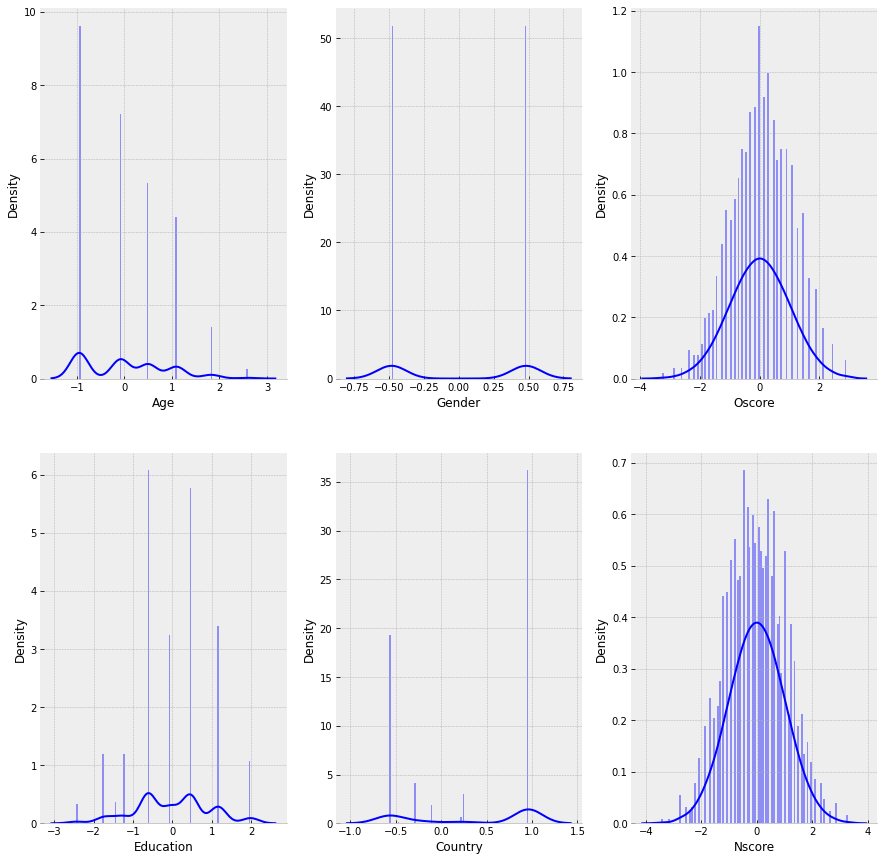

In [ ]:
# Remove warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

# Set up the matplotlib figure
f, axes = plt.subplots(2, 3, figsize=(15, 15))
sns.despine(left=True)

sns.distplot(df['Age'], color='b', bins=100, 
             hist_kws={'alpha': 0.4}, ax=axes[0, 0], axlabel="Age");

sns.distplot(df['Gender'], color='b', bins=100, 
             hist_kws={'alpha': 0.4}, ax=axes[0, 1]);

sns.distplot(df['Education'], color='b', bins=100, 
             hist_kws={'alpha': 0.4}, ax=axes[1, 0]);

sns.distplot(df['Country'], color='b', bins=100, 
             hist_kws={'alpha': 0.4}, ax=axes[1, 1]);

sns.distplot(df['Nscore'], color='b', bins=100, 
             hist_kws={'alpha': 0.4}, ax=axes[1, 2]);

sns.distplot(df['Oscore'], color='b', bins=100, 
             hist_kws={'alpha': 0.4}, ax=axes[0, 2]);

We observe that quota method with respect to gender has been used to create this dataset.

In [ ]:
print(df.Cannabis.value_counts())

CL6    463
CL0    413
CL2    266
CL3    211
CL1    207
CL5    185
CL4    140
Name: Cannabis, dtype: int64


In [ ]:
print(df.Semeron.value_counts())

CL0    1877
CL2       3
CL3       2
CL1       2
CL4       1
Name: Semeron, dtype: int64


There are only 5 classes for the fictive drug. No one claimed having used this drug in last week or day but 8 persons obviously lied. We should remove the liars from the dataset.

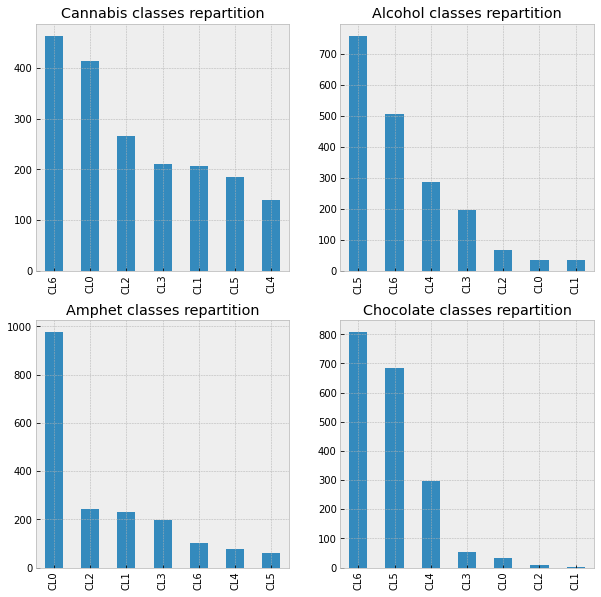

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
df.Cannabis.value_counts().plot(kind="bar", 
                                title = "Cannabis classes repartition", 
                                ax=axes[0, 0])
df.Alcohol.value_counts().plot(kind="bar", 
                                title = "Alcohol classes repartition", 
                                ax=axes[0, 1])
df.Amphet.value_counts().plot(kind="bar", 
                                title = "Amphet classes repartition", 
                                ax=axes[1, 0])
df.Chocolate.value_counts().plot(kind="bar", 
                                title = "Chocolate classes repartition", 
                                ax=axes[1, 1])

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

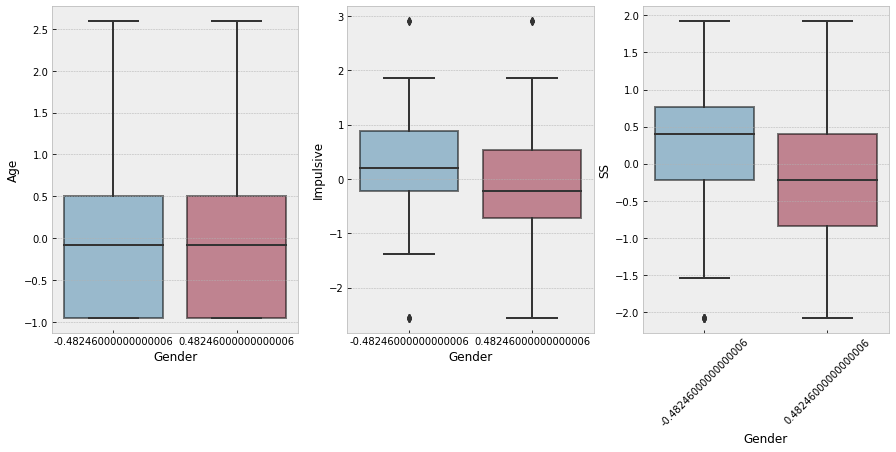

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(15, 6))

# Gender and age are well described in the dataset
ax = sns.boxplot(x='Gender', y="Age", data=df, ax=axes[0])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
# Male are more likely to be impulsive (or to say/admit it)
ax = sns.boxplot(x='Gender', y="Impulsive", data=df, ax=axes[1])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
# Sensation seeing
ax = sns.boxplot(x='Gender', y="SS", data=df, ax=axes[2])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

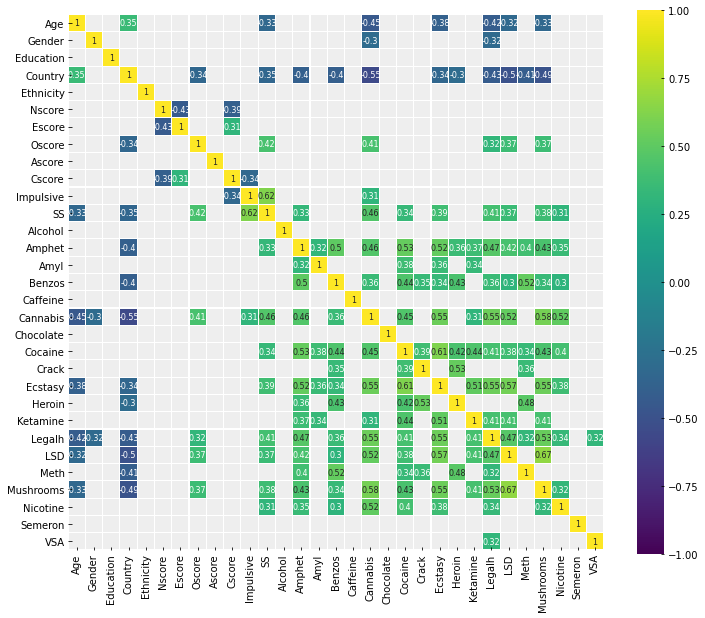

In [ ]:
encoder = OrdinalEncoder()

# Let's tranform our data in classes
corr = df.drop(["ID"], axis=1)
drugs=["Alcohol", "Amphet", "Amyl", "Benzos", "Caffeine", "Cannabis", 
    "Chocolate", "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine", 
    "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semeron", "VSA"]
for drug in drugs:
  corr[[drug]] = encoder.fit_transform(corr[[drug]])

corr=corr.corr() 
encoder.categories_
plt.figure(figsize=(12, 10))

# Display linear correlation only above 0.3 and below -0.3.
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

There is no strong linear correlation between drugs and features (I admit that above 0.7-0.8% correlation is strong). On the other hands, drugs are quite correlated together, this is known as the pleiade of drugs. This concept is well described and analized in their study.

# Preprocessing


This function create the dataframe to apply our model. We only keep the features we want and we encode the categorical `drug` features into 7 classes :
* 0 : Never Used
* 1 : Used over a Decade Ago
* 2 : Used in Last Decade
* 3 : Used in Last Year
* 4 : Used in Last Month
* 5 : Used in Last Week
* 6 : Used in Last Day

In [ ]:
def SelectDataProcessing(drug):
  # Remove all other drugs and ID except the selected one from dataframe
  drugs=["Alcohol", "Amphet", "Amyl", "Benzos", "Caffeine", "Cannabis", 
     "Chocolate", "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine", 
     "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semeron", "VSA"]
  drugs.remove(drug)
  # Remove unwanted features (if unticked)
  features = [Age, Gender, Education,	Country,	Ethnicity,	Nscore, 
              Escore,	Oscore,	Ascore,	Cscore,	Impulsive, SS]
  features_names = ["Age", "Gender", "Education",	"Country",	"Ethnicity",	
                    "Nscore", "Escore",	"Oscore",	"Ascore",	"Cscore",	
                    "Impulsive", "SS"]
  unwanted_feature = []
  for i in range(len(features_names)):
    if not features[i]:
      unwanted_feature.append(features_names[i])

  X = df.drop(["ID"] + drugs + unwanted_feature, axis=1)

  # Encode categorical variable 
  encoder = OrdinalEncoder()
  X[[drug]] = encoder.fit_transform(X[[drug]])
  encoder.categories_
  y = X[[drug]]

  # Binarization: Reduce 7 classes to 2 classes
  y.replace(to_replace=1, value=0, inplace=True)
  y.replace(to_replace=2, value=0, inplace=True)
  y.replace(to_replace=3, value=1, inplace=True)
  y.replace(to_replace=4, value=1, inplace=True)
  y.replace(to_replace=5, value=1, inplace=True)
  y.replace(to_replace=6, value=1, inplace=True)

  # Separate X and y
  X.drop(drug, axis=1, inplace=True)
  return X, y

# Supervised Learning (classification)

Select the drug and the features you want to keep to try the models. Then collapse Supervised Learning section, run it and go to results.

## Selection


In [ ]:
#@markdown **Please untick feature if you don't want it.**

Age = True #@param {type:"boolean"}
Gender = True #@param {type:"boolean"}
Education = True #@param {type:"boolean"}
Country = True #@param {type:"boolean"}
Ethnicity = True #@param {type:"boolean"}
Nscore = True #@param {type:"boolean"}
Escore = True #@param {type:"boolean"}
Oscore = True #@param {type:"boolean"}
Ascore = True #@param {type:"boolean"}
Cscore = True #@param {type:"boolean"}
Impulsive = True #@param {type:"boolean"}
SS = True #@param {type:"boolean"}

#@markdown **/!\ Don't forget to run this cell !!**

Just replace the drug below among those there : 
Alcohol	Amphet Amyl Benzos Caffeine Cannabis Chocolate Cocaine Crack Ecstasy Heroin Ketamine Legalh LSD	Meth Mushrooms Nicotine Semeron	VSA.

In [ ]:
#@markdown **Please select the drug.**
drug = 'Cannabis' #@param ["Alcohol", "Amphet", "Amyl", "Benzos", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semeron", "VSA"]
X, y = SelectDataProcessing(drug)
#@markdown **/!\ Don't forget to run this cell !!**

Features :

In [ ]:
X.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


Response :

In [ ]:
y.head()

,Cannabis
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0


In [ ]:
current_data = pd.merge(X, y, left_index=True, right_index=True)

In [ ]:
current_data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0.0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1.0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1.0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0.0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1.0


## DataViz

Let us visualize our data we are going to use for training in function of the selected drug.

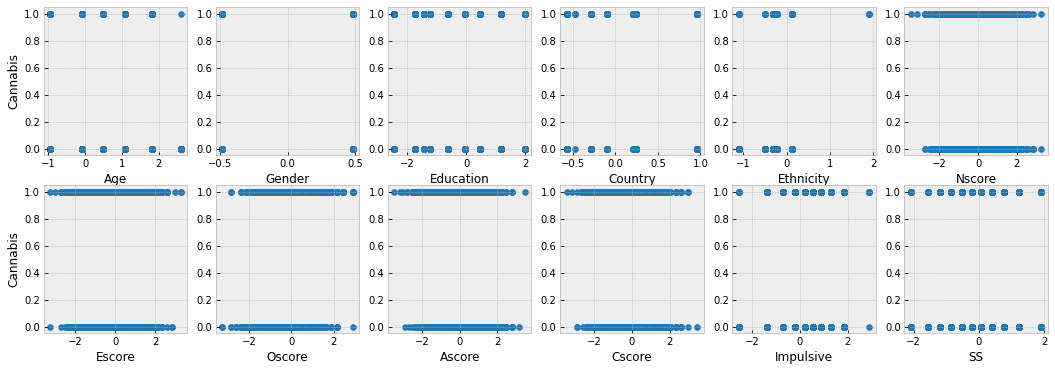

In [ ]:
fig, ax = plt.subplots(2, 6, figsize=(18, 6))
column=0
row=0
for feature in X.columns:
  ax[row,column].scatter(X[feature], y, color='tab:blue')
  ax[row,column].set_xlabel(feature)
  if column==0:
    ax[row,column].set_ylabel(drug)
  if column==5 or column==X.shape[1]:
    column=0
    row=1
  else:
    column+=1

plt.show()

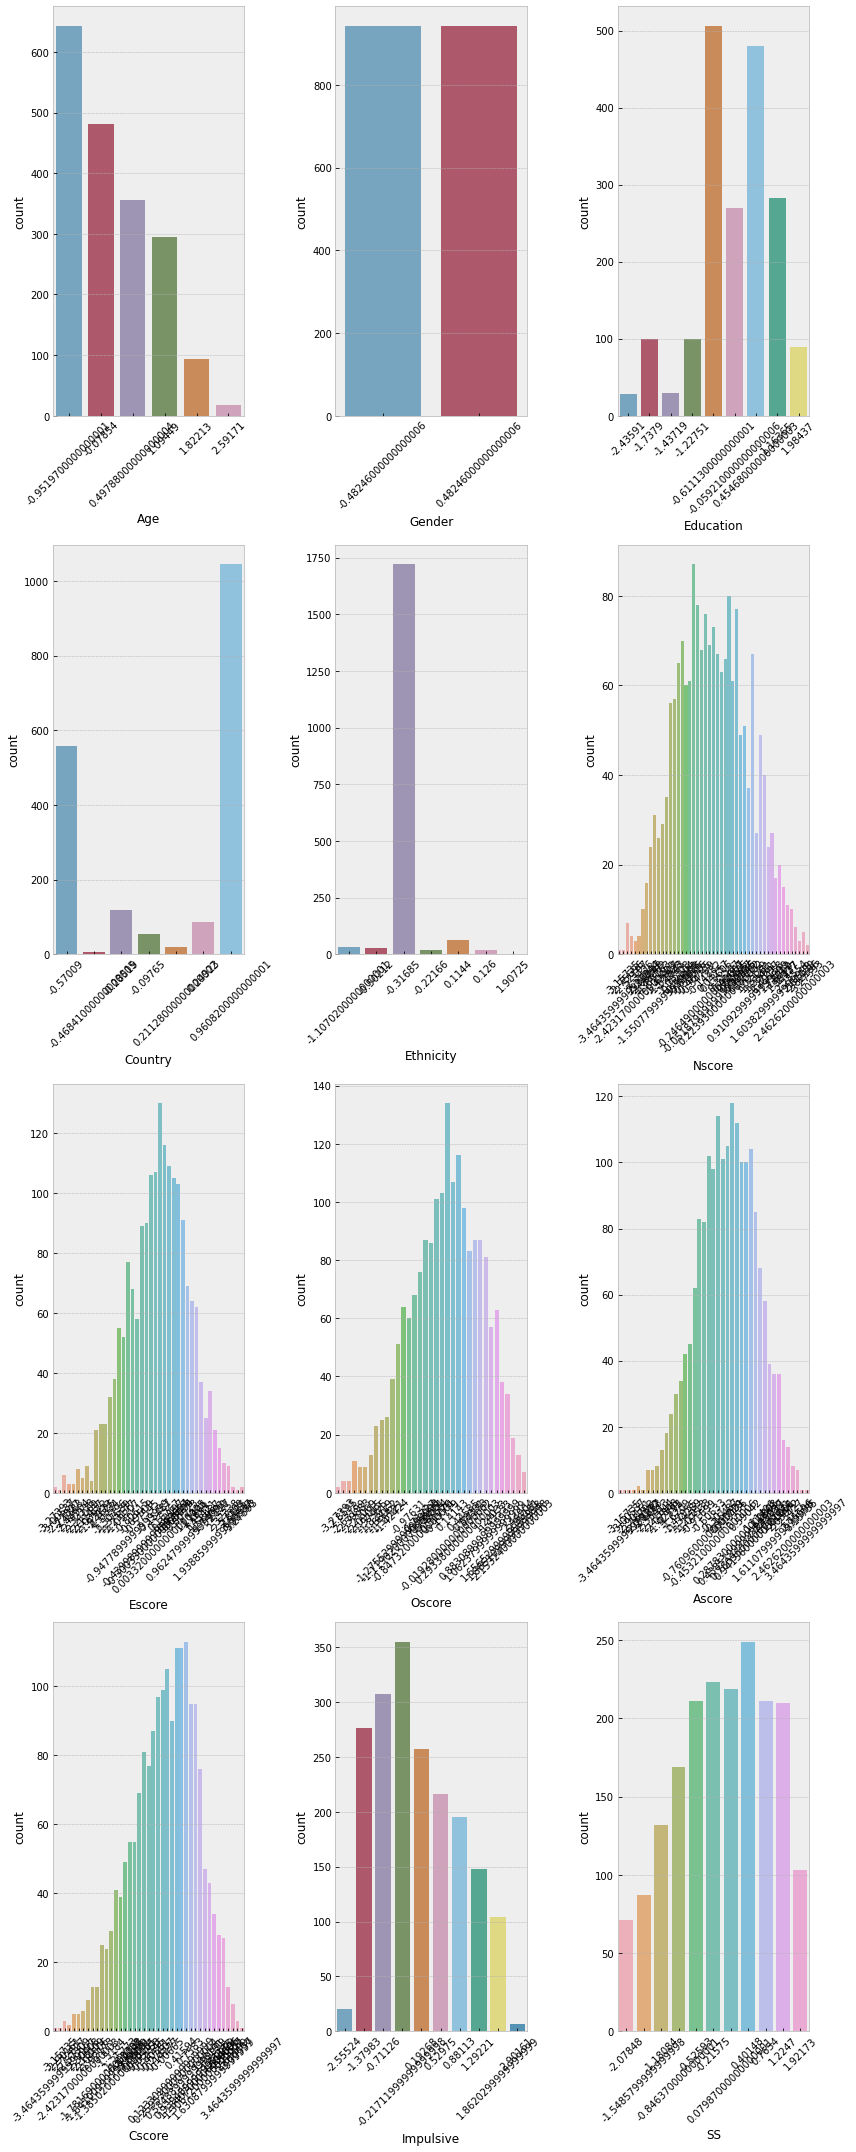

In [ ]:
fig, axes = plt.subplots(round(len(current_data.columns) / 3), 3, 
                         figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(current_data.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), 
                           rotation=45)
        sns.countplot(x=current_data.columns[i], 
                      alpha=0.7, 
                      data=current_data, 
                      ax=ax)

fig.tight_layout()

 ## Applying models

Holdout Method: split the dataset in training and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Create models
np.random.seed(12345)
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
rdmforest = RandomForestClassifier()
boost = GradientBoostingClassifier()
knn = KNeighborsClassifier()

To see the tunable parameters of our models:

In [ ]:
logreg.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

This function train the model on the training set with various combinations of hyperparameters using the gridsearch. It return the prediction on the test set with the best model, the metrics and plot the confusion matrix.

In [ ]:
# Useful for display
import warnings
warnings.filterwarnings('ignore') 


def model_execution(model, display_gridsearch=False):
  # Define here the parameter combinations to try for each model
  # model.get_params to know the parameters
  if model == logreg:
    tuned_parameters = [{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]}]
  if model == tree:
    tuned_parameters = {'max_features': ['log2', 'sqrt','auto'], 
                        'criterion': ['entropy', 'gini'],
                        'max_depth': [2, 3, 5, 7, 10], 
                        'min_samples_split': [2, 3, 5],
                        'min_samples_leaf': [1, 5, 8]}
  if model == rdmforest:
    tuned_parameters = {'n_estimators': [4, 6, 9], 
                        'max_features': ['log2', 'sqrt','auto'], 
                        'criterion': ['entropy', 'gini'],
                        'max_depth': [2, 5, 10]}
  if model == boost:
    tuned_parameters = {'n_estimators': [4, 6, 9], 
                        'max_features': ['log2', 'sqrt','auto'], 
                        'max_depth': [5]}
  if model == knn:
    tuned_parameters = [{'n_neighbors': [5, 10, 20, 30, 40, 50, 
                                        60, 70, 80, 90, 100, 110, 
                                        120, 130, 140, 150, 200]}]
  # The metrics to maximize
  scores = ['precision_macro', 'recall_macro', 'accuracy']

  # Useful to store best classifier
  previous_accuracy = 0

  for score in scores:
      print("\033[1m# Tuning hyper-parameters for %s\n" % score)

      # Train the model for each combination using the training set
      clf = GridSearchCV(model, tuned_parameters, scoring=score)
      clf.fit(X_train, y_train)

      print("\033[0mBest parameters set found on development set:\n")
      clf_best_params_ = clf.best_params_
        # Display parameters found
      values = list(clf_best_params_.values())
      keys = list(clf_best_params_.keys())
      parameters = ''
      for i in range(len(values)):
        parameters += str(keys[i]) + ' = ' + str(values[i]) + ', '
      print(parameters)

      # Set the classifier to the best combination of parameters
      clf = clf.best_estimator_

      # Fit the best algorithm to the data. 
      clf.fit(X_train, y_train)

      # Predict on test set
      y_pred = clf.predict(X_test)

      # Display accuracy for current tested model
      accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
      print('Accuracy obtained with these parameters: \033[1m' 
            + str(accuracy) + '\033[0m\n')
      
      # Store the best model
      if previous_accuracy <= accuracy:
        best_clf = clf
        clf_best_params = clf_best_params_
        previous_accuracy = accuracy

      # To see all combination and result of grid search :
      if display_gridsearch:
        print("\nGrid scores on development set:\n")
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))

  # Predict on test set with the best classifier found
  y_pred = best_clf.predict(X_test)

  # Plot confusion matrix
  print("\nConfusion matrix for the best classifier: \n")
  plot_confusion_matrix(best_clf, X=X_test, y_true=y_test) 

  # for convenience we can also print the multilabel confusion matrix
  #multilabel_confusion_matrix(y_true, y_pred)

  # Classification report
  report = classification_report(y_test, y_pred, 
                            labels=[0, 1], output_dict=True)
  
  # Compute accuracy
  model_accuracy = round(accuracy_score(y_true=y_test, y_pred=y_pred), 5)

  return y_pred, report, clf_best_params, model_accuracy

### Logistic regression

# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:

C = 100, 
Accuracy obtained with these parameters: 0.8328912466843501

# Tuning hyper-parameters for recall_macro

Best parameters set found on development set:

C = 100, 
Accuracy obtained with these parameters: 0.8328912466843501

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

C = 100, 
Accuracy obtained with these parameters: 0.8328912466843501


Confusion matrix for the best classifier: 



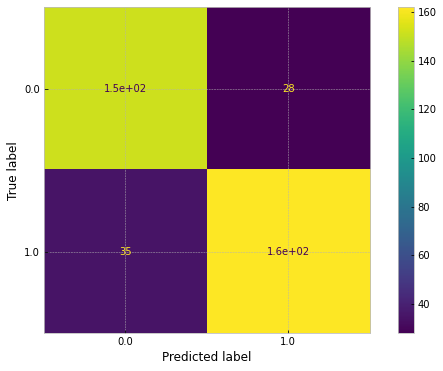

In [ ]:
# Execute model and compute accuracy on test set
y_pred, \
logreg_report, \
logreg_best_params_, \
logreg_accuracy = model_execution(logreg)

### Decision Tree

# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:

criterion = entropy, max_depth = 5, max_features = sqrt, min_samples_leaf = 8, min_samples_split = 5, 
Accuracy obtained with these parameters: 0.8116710875331565

# Tuning hyper-parameters for recall_macro

Best parameters set found on development set:

criterion = entropy, max_depth = 5, max_features = sqrt, min_samples_leaf = 8, min_samples_split = 5, 
Accuracy obtained with these parameters: 0.8169761273209549

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

criterion = gini, max_depth = 5, max_features = auto, min_samples_leaf = 1, min_samples_split = 3, 
Accuracy obtained with these parameters: 0.7692307692307693


Confusion matrix for the best classifier: 



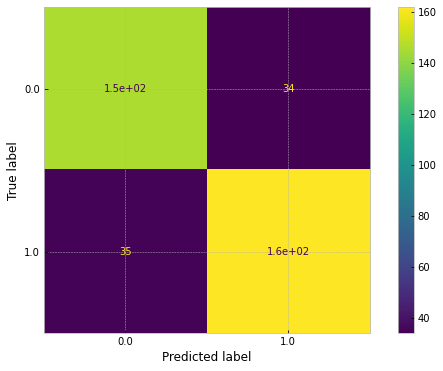

In [ ]:
# Execute model and compute accuracy on test set
y_pred, tree_report, tree_best_params_, tree_accuracy = model_execution(tree)

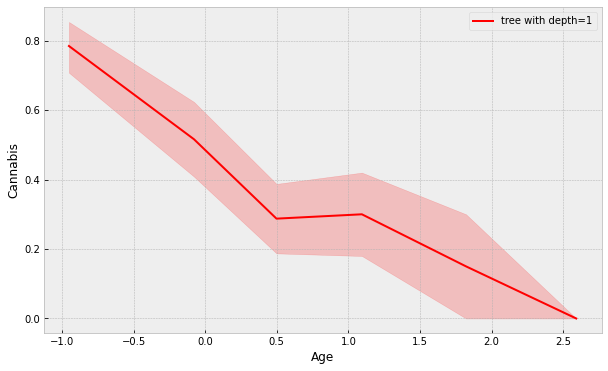

In [ ]:
fig = plt.Figure()
sns.lineplot(x=X_test.columns[0], y=y_pred, 
            color='r', data=X_test, ax=fig.gca(),
            label="tree with depth=1").set_ylabel(drug)
fig

In [ ]:
def create_and_show_tree(data, y, estimator, ax=None):
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(estimator.max_depth*5,5))
    estimator.fit(data, y)
    _ = plot_tree(estimator, ax=ax, fontsize=12)
    return estimator

If we wanted to visualize the tree we would see something like that but with much more leaves :

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

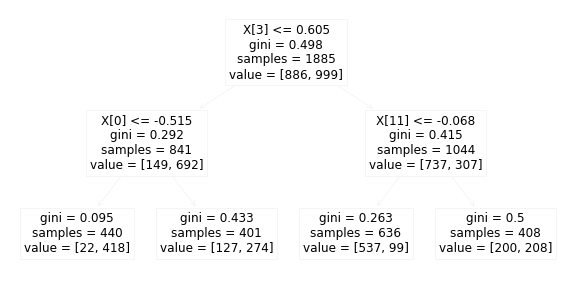

In [ ]:
create_and_show_tree(X, y, DecisionTreeClassifier(max_depth=2)) # For instance

### Random forests

# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:

criterion = gini, max_depth = 5, max_features = sqrt, n_estimators = 9, 
Accuracy obtained with these parameters: 0.8328912466843501

# Tuning hyper-parameters for recall_macro

Best parameters set found on development set:

criterion = entropy, max_depth = 5, max_features = log2, n_estimators = 9, 
Accuracy obtained with these parameters: 0.8275862068965517

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

criterion = entropy, max_depth = 5, max_features = sqrt, n_estimators = 9, 
Accuracy obtained with these parameters: 0.8222811671087533


Confusion matrix for the best classifier: 



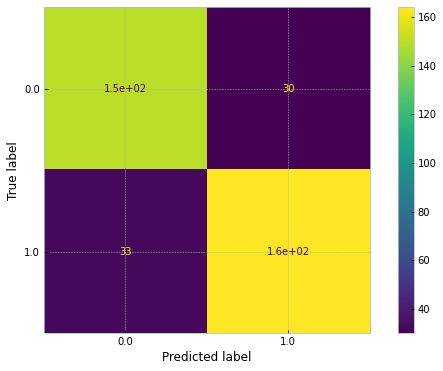

In [ ]:
# Execute model and compute accuracy on test set
y_pred, \
rdmforest_report, \
rdmforest_best_params_, \
rdmforest_accuracy = model_execution(rdmforest)

### Boosting model

# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:

max_depth = 5, max_features = sqrt, n_estimators = 9, 
Accuracy obtained with these parameters: 0.8461538461538461

# Tuning hyper-parameters for recall_macro

Best parameters set found on development set:

max_depth = 5, max_features = log2, n_estimators = 9, 
Accuracy obtained with these parameters: 0.8275862068965517

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

max_depth = 5, max_features = log2, n_estimators = 9, 
Accuracy obtained with these parameters: 0.8249336870026526


Confusion matrix for the best classifier: 



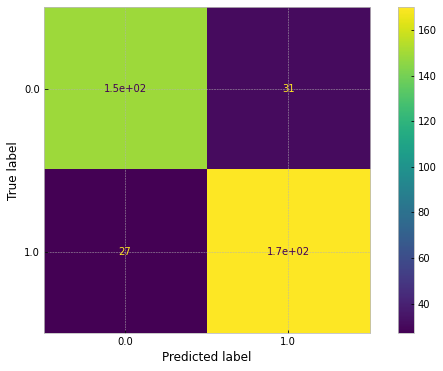

In [ ]:
# Execute model and compute accuracy on test set
y_pred, \
boosting_report, \
boosting_best_params_, \
boosting_accuracy = model_execution(boost)

### KNN

# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:

n_neighbors = 90, 
Accuracy obtained with these parameters: 0.8408488063660478

# Tuning hyper-parameters for recall_macro

Best parameters set found on development set:

n_neighbors = 130, 
Accuracy obtained with these parameters: 0.843501326259947

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

n_neighbors = 130, 
Accuracy obtained with these parameters: 0.843501326259947


Confusion matrix for the best classifier: 



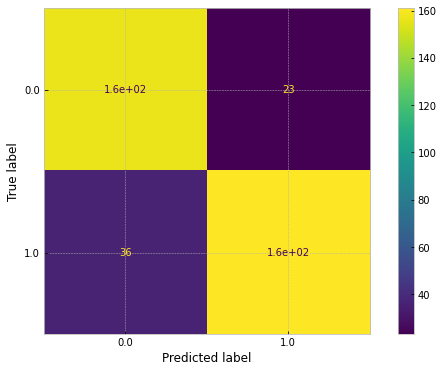

In [ ]:
# Execute model and compute accuracy on test set
y_pred, knn_report, knn_best_params_, knn_accuracy = model_execution(knn)

## Results

### Accuracy

Here is the accuracy and the best parameters found for each model with the selected features (X stands for used):

In [ ]:
features = [Age, Gender, Education,	Country,	Ethnicity,	Nscore, 
            Escore,	Oscore,	Ascore,	Cscore,	Impulsive, SS]
features_names = ["Age", "Gender", "Education",	"Country",	"Ethnicity",	
                  "Nscore", "Escore",	"Oscore",	"Ascore",	"Cscore",	
                  "Impulsive", "SS"]

all_models_accuracy = pd.DataFrame([{**{"logistic regression": logreg_accuracy,
                                   "Classification tree": tree_accuracy,
                                   "Random Forest": rdmforest_accuracy,
                                   "Boosting model": boosting_accuracy,
                                   "KNN": knn_accuracy},
                                   **{features_names[i]: 
                                    ("X" if features[i] else "") 
                                    for i in range(len(features))}}, 
                                    {"logistic regression": logreg_best_params_,
                                   "Classification tree": tree_best_params_,
                                   "Random Forest": rdmforest_best_params_,
                                   "Boosting model": boosting_best_params_,
                                   "KNN": knn_best_params_}],
                                  index=["accuracy for " + drug] 
                                   + ["Best parameters for model"]) \
                                   .replace(np.nan, '', regex=True)

# To keep record of results
all_models_accuracy.to_csv(drug + '_accuracy.csv', header=True)
all_models_accuracy

,logistic regression,Classification tree,Random Forest,Boosting model,KNN,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
accuracy for Cannabis,0.83289,0.81698,0.83289,0.84615,0.8435,X,X,X,X,X,X,X,X,X,X,X,X
Best parameters for model,{'C': 100},"{'criterion': 'entropy', 'max_depth': 5, 'max_...","{'criterion': 'gini', 'max_depth': 5, 'max_fea...","{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",{'n_neighbors': 130},,,,,,,,,,,,


Compare results

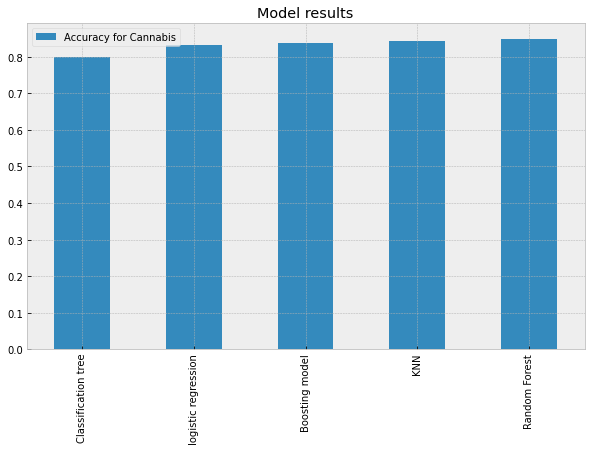

In [ ]:
pd.DataFrame(pd.Series({"logistic regression": logreg_accuracy,
                  "Classification tree": tree_accuracy,
                  "Random Forest": rdmforest_accuracy,
                  "Boosting model": boosting_accuracy,
                  "KNN": knn_accuracy}), 
             index=["logistic regression", 
                    "Classification tree", 
                    "Random Forest", 
                    "Boosting model", 
                    "KNN"], 
             columns=["Accuracy for " + drug]
             ) \
             .sort_values(by="Accuracy for " + drug) \
             .plot(kind = "bar", title = "Model results")

And here is further metrics for each model:

### Reports

In [ ]:
df_logreg_report = pd.DataFrame(logreg_report) \
                   .rename_axis(drug +" logreg report", axis=1)
df_logreg_report

Cannabis logreg report,0,1,accuracy,macro avg,weighted avg
precision,0.812834,0.852632,0.832891,0.832733,0.833630
recall,0.844444,0.822335,0.832891,0.833390,0.832891
f1-score,0.828338,0.837209,0.832891,0.832774,0.832974
support,180.000000,197.000000,0.832891,377.000000,377.000000


In [ ]:
df_tree_report = pd.DataFrame(tree_report) \
                 .rename_axis(drug +" tree report", axis=1)
df_tree_report

Cannabis tree report,0,1,accuracy,macro avg,weighted avg
precision,0.779570,0.816754,0.798408,0.798162,0.799000
recall,0.805556,0.791878,0.798408,0.798717,0.798408
f1-score,0.792350,0.804124,0.798408,0.798237,0.798502
support,180.000000,197.000000,0.798408,377.000000,377.000000


In [ ]:
df_rdmforest_report = pd.DataFrame(rdmforest_report) \
                      .rename_axis(drug +" rdmforest report", axis=1)
df_rdmforest_report

Cannabis rdmforest report,0,1,accuracy,macro avg,weighted avg
precision,0.836066,0.860825,0.848806,0.848445,0.849003
recall,0.850000,0.847716,0.848806,0.848858,0.848806
f1-score,0.842975,0.854220,0.848806,0.848598,0.848851
support,180.000000,197.000000,0.848806,377.000000,377.000000


In [ ]:
df_boosting_report = pd.DataFrame(boosting_report) \
                     .rename_axis(drug +" boosting report", axis=1)
df_boosting_report

Cannabis boosting report,0,1,accuracy,macro avg,weighted avg
precision,0.821622,0.854167,0.838196,0.837894,0.838628
recall,0.844444,0.832487,0.838196,0.838466,0.838196
f1-score,0.832877,0.843188,0.838196,0.838032,0.838265
support,180.000000,197.000000,0.838196,377.000000,377.000000


In [ ]:
df_knn_report = pd.DataFrame(knn_report) \
                .rename_axis(drug +" knn report", axis=1)
df_knn_report

Cannabis knn report,0,1,accuracy,macro avg,weighted avg
precision,0.813472,0.875000,0.843501,0.844236,0.845623
recall,0.872222,0.817259,0.843501,0.844741,0.843501
f1-score,0.841823,0.845144,0.843501,0.843484,0.843559
support,180.000000,197.000000,0.843501,377.000000,377.000000


In [ ]:
frames = [df_logreg_report, df_tree_report, df_rdmforest_report, 
          df_boosting_report, df_knn_report]
results = pd.concat(frames, axis=0, keys=["Logistic Regression", 
                                          "Decision Tree", 
                                          "Random Forest",
                                          "Boosting","KNN"]) \
             .rename_axis("Metrics", axis=1)
results

Metrics                                 0           1  ...   macro avg  weighted avg
Logistic Regression precision    0.812834    0.852632  ...    0.832733      0.833630
                    recall       0.844444    0.822335  ...    0.833390      0.832891
                    f1-score     0.828338    0.837209  ...    0.832774      0.832974
                    support    180.000000  197.000000  ...  377.000000    377.000000
Decision Tree       precision    0.779570    0.816754  ...    0.798162      0.799000
                    recall       0.805556    0.791878  ...    0.798717      0.798408
                    f1-score     0.792350    0.804124  ...    0.798237      0.798502
                    support    180.000000  197.000000  ...  377.000000    377.000000
Random Forest       precision    0.836066    0.860825  ...    0.848445      0.849003
                    recall       0.850000    0.847716  ...    0.848858      0.848806
                    f1-score     0.842975    0.854220  ...    0.848598      0.848851
                    support    180.000000  197.000000  ...  377.000000    377.000000
Boosting            precision    0.821622    0.854167  ...    0.837894      0.838628
                    recall       0.844444    0.832487  ...    0.838466      0.838196
                    f1-score     0.832877    0.843188  ...    0.838032      0.838265
                    support    180.000000  197.000000  ...  377.000000    377.000000
KNN                 precision    0.813472    0.875000  ...    0.844236      0.845623
                    recall       0.872222    0.817259  ...    0.844741      0.843501
                    f1-score     0.841823    0.845144  ...    0.843484      0.843559
                    support    180.000000  197.000000  ...  377.000000    377.000000

[20 rows x 5 columns]

# Compile results

To launch this part of the code, it is required to have launched the classifiers for the 18 drugs.

In [ ]:
drugs = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caffeine", "Cannabis", 
         "Chocolate", "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine", 
         "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "VSA"]

frames = []
for drug in drugs:
  frames.append(pd.read_csv(drug + "_accuracy.csv", index_col=0))

results = pd.concat(frames).replace(np.nan, '', regex=True)
# To keep record of results
results.to_csv('All_accuracy.csv', header=True)
results

,logistic regression,Classification tree,Random Forest,Boosting model,KNN,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
accuracy for Alcohol,0.95491,0.95491,0.96021,0.95491,0.95491,X,X,X,X,X,X,X,X,X,X,X,X
Best parameters for model,{'C': 1},"{'criterion': 'entropy', 'max_depth': 3, 'max_...","{'criterion': 'entropy', 'max_depth': 5, 'max_...","{'max_depth': 5, 'max_features': 'log2', 'n_es...",{'n_neighbors': 20},,,,,,,,,,,,
accuracy for Amphet,0.80371,0.79576,0.81698,0.79576,0.81432,X,,X,X,X,X,X,X,X,X,X,X
Best parameters for model,{'C': 1},"{'criterion': 'gini', 'max_depth': 3, 'max_fea...","{'criterion': 'gini', 'max_depth': 2, 'max_fea...","{'max_depth': 5, 'max_features': 'auto', 'n_es...",{'n_neighbors': 30},,,,,,,,,,,,
accuracy for Amyl,0.93634,0.93634,0.93634,0.93634,0.93634,X,,X,X,X,X,,X,,X,X,X
Best parameters for model,{'C': 1},"{'criterion': 'entropy', 'max_depth': 2, 'max_...","{'criterion': 'entropy', 'max_depth': 2, 'max_...","{'max_depth': 5, 'max_features': 'log2', 'n_es...",{'n_neighbors': 20},,,,,,,,,,,,
accuracy for Benzos,0.72679,0.73475,0.75066,0.73475,0.7374,X,X,,X,X,X,X,,X,,X,X
Best parameters for model,{'C': 1},"{'criterion': 'entropy', 'max_depth': 5, 'max_...","{'criterion': 'gini', 'max_depth': 5, 'max_fea...","{'max_depth': 5, 'max_features': 'auto', 'n_es...",{'n_neighbors': 70},,,,,,,,,,,,
accuracy for Caffeine,0.97082,0.97082,0.97082,0.97082,0.97082,X,,X,X,X,,,X,X,,X,
Best parameters for model,{'C': 1},"{'criterion': 'gini', 'max_depth': 5, 'max_fea...","{'criterion': 'entropy', 'max_depth': 2, 'max_...","{'max_depth': 5, 'max_features': 'log2', 'n_es...",{'n_neighbors': 10},,,,,,,,,,,,
